In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#For interactive plots
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
#load the data
fertilizers = pd.read_csv('data/fao_data_fertilizers_data.csv')
beehives = fertilizers.loc[fertilizers['category']=='beehives']
beehives.head()




,country_or_area,element_code,element,year,unit,value,value_footnotes,category
8042,Africa +,11,Stocks,2007.0,No,16199398.0,A,beehives
8043,Africa +,11,Stocks,2006.0,No,16214756.0,A,beehives
8044,Africa +,11,Stocks,2005.0,No,15362910.0,A,beehives
8045,Africa +,11,Stocks,2004.0,No,15803095.0,A,beehives
8046,Africa +,11,Stocks,2003.0,No,15465850.0,A,beehives


Separate the different countries and areas in two different lists

In [3]:
countries_and_areas=beehives['country_or_area'].unique()
countries=countries_and_areas[[x.find('+')==-1 for x in countries_and_areas]]
weird_stuff=countries[-5:]
countries=countries[:-5]

areas=countries_and_areas[[x.find('+')!=-1 for x in countries_and_areas]]
print('Countries: ')
print(countries.tolist())
print('\nAreas: ')
print(areas.tolist())
print('\nWeird stuff: ')
print(weird_stuff.tolist())

Countries: 
['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burundi', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'China, mainland', 'Colombia', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Czechoslovakia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Ethiopia PDR', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Georgia', 'Germany', 'Greece', 'Greenland', 'Guadeloupe', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iran, Islamic Republic of', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Republic of', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Libyan Arab Jamahiriya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Madagascar', 'Mali', 'Martinique', 'Mexico', 'Moldova', 'M

I found some weird stuff as you can see, I don't know what it is. We should probably try to find out.

We can split again the areas list: some areas are geographical others depend on the developping situation of the country.

I'll check for the weird stuff first:

In [4]:
beehives.loc[beehives['country_or_area']==weird_stuff[0]]

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
14903,fnSeqID,Footnote,NaN,NaN,NaN,NaN,NaN,beehives


Ok, so there is no data in the weird stuff, let's forget about it and clean the data.

In [5]:
beehives = beehives[[name not in weird_stuff.tolist() for name in beehives['country_or_area']]]

Let's split again our areas

In [6]:
geo_areas=areas[[x.lower().find('developing')==-1 and x.lower().find('countries')==-1 for x in areas]]
status_areas=areas[[x.lower().find('developing')!=-1 or x.lower().find('countries')!=-1 for x in areas]]

In [7]:
@interact
def show_beehives_for_country(country=countries):
    beehives_country=beehives.loc[beehives['country_or_area']==country]
    plt.plot(beehives_country['year'],beehives_country['value'],'-*')
    plt.title('Country: '+country)
    plt.xlabel('Years')
    #plt.ylim(0,1.2e7)
    plt.ylabel('Number')
    plt.xlim(1960, 2010)

interactive(children=(Dropdown(description='country', options=('Albania', 'Algeria', 'Angola', 'Argentina', 'A…

In [8]:
@interact
def show_beehives_for_geo_area(area=geo_areas):
    beehives_country=beehives.loc[beehives['country_or_area']==area]
    plt.plot(beehives_country['year'],beehives_country['value'],'-*')
    plt.title('Geographical area: '+area)
    plt.xlabel('Years')
    plt.ylabel('Number')
    plt.xlim(1960, 2010)

interactive(children=(Dropdown(description='area', options=('Africa +', 'Americas +', 'Asia +', 'Australia and…

In [9]:
@interact
def show_beehives_for_status_area(area=status_areas):
    beehives_country=beehives.loc[beehives['country_or_area']==area]
    plt.plot(beehives_country['year'],beehives_country['value'],'-*')
    plt.title('Status area: '+area)
    plt.xlabel('Years')
    plt.ylabel('Number')
    plt.xlim(1960, 2010)

interactive(children=(Dropdown(description='area', options=('LandLocked developing countries +', 'Least Develo…

Other categories in the fertilizer data frame

In [10]:
fertilizers['category'].unique()

array(['animals_live_nes', 'asses', 'beehives', 'buffaloes', 'camels',
       'cattle', 'chickens', 'ducks', 'geese_and_guinea_fowls', 'goats',
       'horses', 'mules', 'other_camelids', 'other_rodents', 'pigs',
       'sheep', 'turkeys'], dtype=object)

Basic ranking of number of beehives per country.  
We could divide by the area of the country to make it more fair?

In [11]:
years=beehives['year'].unique()
@interact
def country_ranking_over_year(year = years ):
    bee_year=beehives[[c in countries for c in beehives['country_or_area']]]
    bee_year=bee_year.loc[beehives['year']==year]
    val=bee_year['value']
    country=bee_year['country_or_area']
    ranking= pd.concat([country, val], axis=1)
    ranking=ranking.sort_values(by='value',ascending=False)
    plt.figure(figsize=(20,10))
    plt.xlim(0, 1.2e7)
    plt.barh(ranking['country_or_area'][:10],ranking['value'][:10])
    plt.xlabel('number of beehives')
    plt.title('top 10')
    plt.gca().invert_yaxis()

interactive(children=(Dropdown(description='year', options=(2007.0, 2006.0, 2005.0, 2004.0, 2003.0, 2002.0, 20…

Distribution of number of beehives per country over year.
Again we could divide by the area of the country

In [12]:
@interact
def dist_over_year(year=years):
    bee_year=beehives[[c in countries for c in beehives['country_or_area']]]
    bee_year=bee_year.loc[beehives['year']==year]
    plt.hist(bee_year['value'],bins=20)
    plt.yscale('log')
    #plt.xscale('log')
    plt.xlim(1e-20,1.2e7)
    plt.ylabel('number of countries')
    plt.xlabel('number of beehives')
    plt.title('beehives distribuion across countries')

interactive(children=(Dropdown(description='year', options=(2007.0, 2006.0, 2005.0, 2004.0, 2003.0, 2002.0, 20…

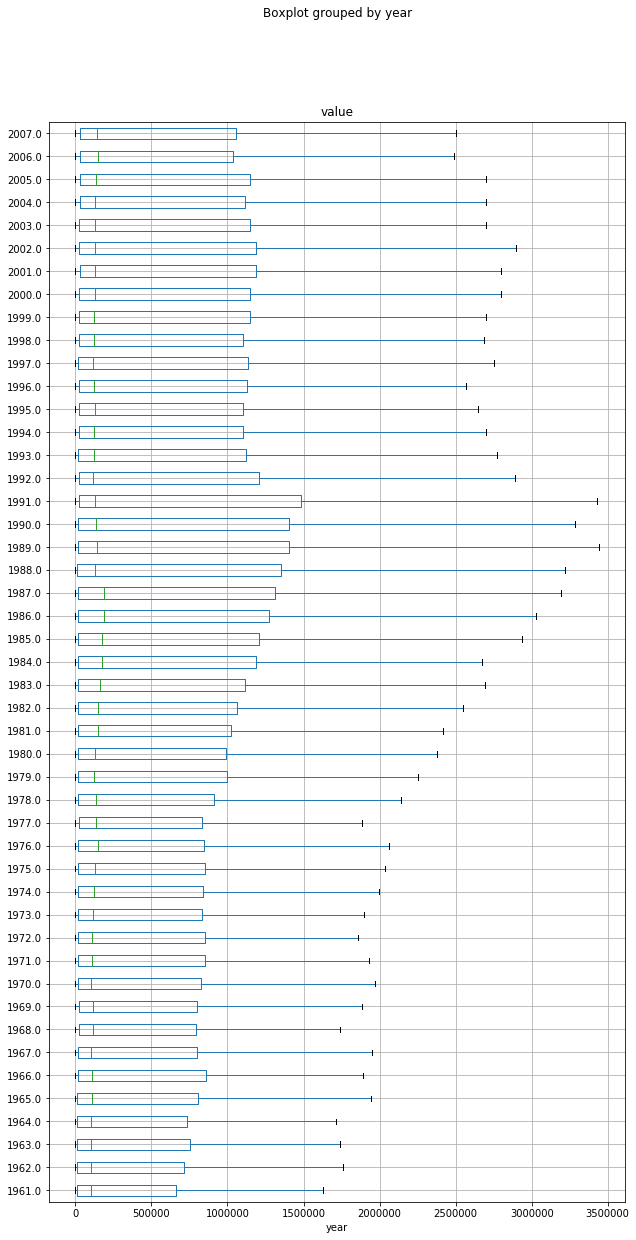

In [13]:
show_outliers=False
beehives.boxplot(column=['value'],by='year',figsize=(10,20),showfliers=show_outliers,vert=False)

In [14]:
land = pd.read_csv('data/fao_data_land_data.csv')
land.head()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Afghanistan,11,Area,2007.0,1000 Ha,38661.0,Q,agricultural_area
1,Afghanistan,11,Area,2006.0,1000 Ha,38659.0,Fm,agricultural_area
2,Afghanistan,11,Area,2005.0,1000 Ha,38515.0,Fm,agricultural_area
3,Afghanistan,11,Area,2004.0,1000 Ha,38064.0,Fm,agricultural_area
4,Afghanistan,11,Area,2003.0,1000 Ha,38899.0,Fm,agricultural_area


In [15]:
land.category.unique()

array(['agricultural_area', 'agricultural_area_irrigated', 'arable_land',
       'arable_land_and_permanent_crops', 'country_area', 'fallow_land',
       'forest_area', 'inland_water', 'land_area', 'other_land',
       'perm_crops_irrigated', 'perm_crops_non_irrigated',
       'perm_meadows_pastures_cult_irrig',
       'perm_meadows_pastures_cult_non_irrig',
       'perm_meadows_pastures_cultivated',
       'perm_meadows_pastures_nat_grown', 'permanent_crops',
       'permanent_meadows_and_pastures', 'temp_crops_irrigated',
       'temp_crops_non_irrigated', 'temp_meadows_pastures_irrigated',
       'temp_meadows_pastures_non_irrig', 'temporary_crops',
       'temporary_meadows_and_pastures',
       'total_area_equipped_for_irrigation'], dtype=object)

In [16]:
land.loc[land.category=='land_area'].loc[land.country_or_area=='China'].head()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
60273,China,11,Area,2007.0,1000 Ha,932748.9,E,land_area
60274,China,11,Area,2006.0,1000 Ha,932748.9,E,land_area
60275,China,11,Area,2005.0,1000 Ha,932748.8,E,land_area
60276,China,11,Area,2004.0,1000 Ha,932748.8,E,land_area
60277,China,11,Area,2003.0,1000 Ha,932748.7,Q,land_area


In [17]:
land.loc[land.category=='land_area'].unit.unique()

array(['1000 Ha', nan], dtype=object)

In [18]:
#compute normalized number of beehives (number of beehives / land area in 1000 Ha)
land_area=land.loc[land.category=='land_area']
land_area=land_area[['country_or_area','year','value']]
land_area.columns=['country_or_area','year','land_area']

beehives=pd.merge(beehives,land_area,on=['country_or_area','year'])
beehives['norm_value']=beehives['value']/beehives['land_area']
beehives.head()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category,land_area,norm_value
0,Africa +,11,Stocks,2007.0,No,16199398.0,A,beehives,2964396.4,5.464653
1,Africa +,11,Stocks,2006.0,No,16214756.0,A,beehives,2964396.4,5.469834
2,Africa +,11,Stocks,2005.0,No,15362910.0,A,beehives,2964396.4,5.182475
3,Africa +,11,Stocks,2004.0,No,15803095.0,A,beehives,2964396.5,5.330965
4,Africa +,11,Stocks,2003.0,No,15465850.0,A,beehives,2964396.5,5.217200


In [19]:
years=beehives['year'].unique()
@interact(top=(3,100,1))
def normalized_country_ranking_over_year(year = years ,top=10):
    #get the country data
    bee_year=beehives[[c in countries for c in beehives['country_or_area']]]
    #get data of the seected year
    bee_year=bee_year.loc[beehives['year']==year]
    
    #prepare the ranking 
    bee_year=bee_year.sort_values(by='norm_value',ascending=False)
    
    #plotting
    plt.figure(figsize=(15,top))
    plt.barh(bee_year['country_or_area'][:top],bee_year['norm_value'][:top])
    plt.xlabel('number of beehives/land area')
    plt.title('Number of beehives per 1000Ha\ntop %d' % top)
    plt.gca().invert_yaxis()
    plt.xlim(0,250)

interactive(children=(Dropdown(description='year', options=(2007.0, 2006.0, 2005.0, 2004.0, 2003.0, 2002.0, 20…

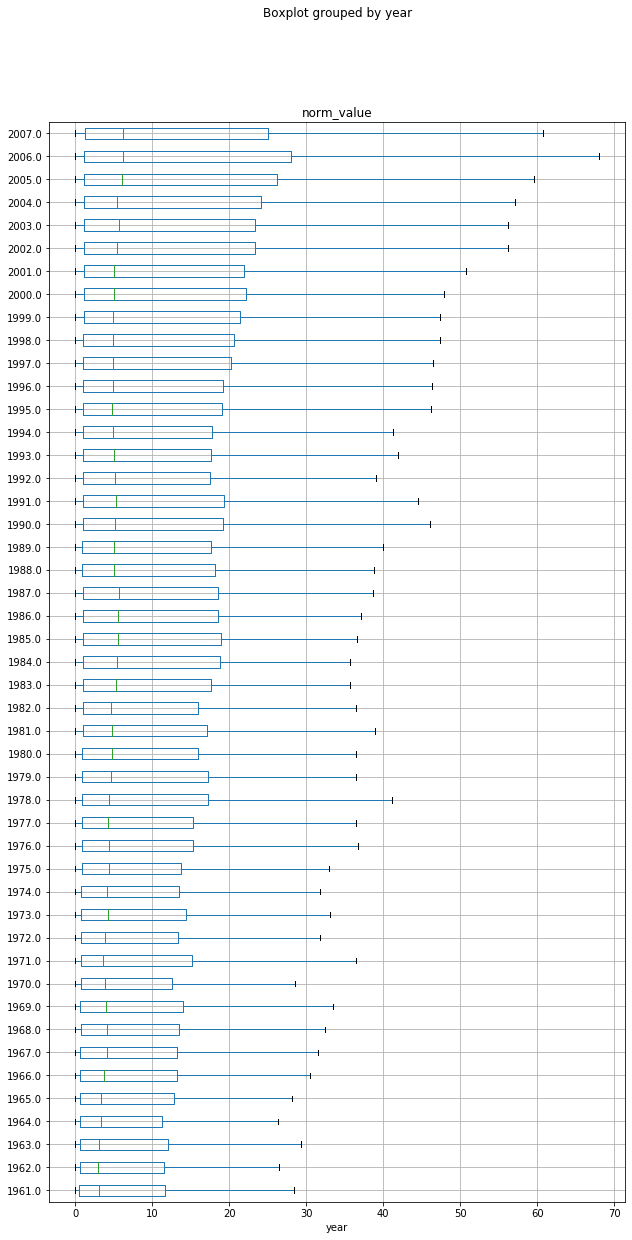

In [20]:
show_outliers=False
beehives.boxplot(column=['norm_value'],by='year',figsize=(10,20),showfliers=show_outliers,vert=False)

In [21]:
@interact
def dist_over_year(year=years):
    bee_year=beehives[[c in countries for c in beehives['country_or_area']]]
    bee_year=bee_year.loc[beehives['year']==year]
    plt.hist(bee_year['norm_value'],bins=20)
    plt.yscale('log')
    #plt.xscale('log')
    #plt.xlim(1e-20,1.2e7)
    plt.ylabel('number of countries')
    plt.xlabel('number of beehives per 1000 Ha')
    plt.title('Normalized beehives distribuion across countries')

interactive(children=(Dropdown(description='year', options=(2007.0, 2006.0, 2005.0, 2004.0, 2003.0, 2002.0, 20…

In [22]:
beehives_onlyCountries = beehives[~beehives.country_or_area.str.contains("\+", na = False)]

Number of Beehives around the world grouped by year 

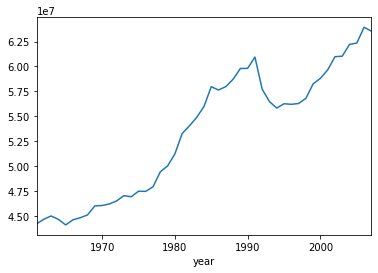

In [23]:
beehives_onlyCountries.groupby('year')['value'].apply(lambda x : x.astype(int).sum()).plot()

In [24]:
harvest_data = pd.read_csv('data/fao_data_crops_data.csv')


In [25]:
harvest_data.head()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Americas +,31,Area Harvested,2007.0,Ha,49404.0,A,agave_fibres_nes
1,Americas +,31,Area Harvested,2006.0,Ha,49404.0,A,agave_fibres_nes
2,Americas +,31,Area Harvested,2005.0,Ha,49404.0,A,agave_fibres_nes
3,Americas +,31,Area Harvested,2004.0,Ha,49113.0,A,agave_fibres_nes
4,Americas +,31,Area Harvested,2003.0,Ha,48559.0,A,agave_fibres_nes


In [26]:
harvest_data.element.unique()

array(['Area Harvested', 'Yield', 'Production Quantity', nan, 'Seed',
       'Gross Production 1999-2001 (1000 I$)',
       'Net Production 1999-2001 (1000 I$)', 'Gross PIN (base 1999-2001)',
       'Grs per capita PIN (base 1999-2001)', 'Net PIN (base 1999-2001)',
       'Net per capita PIN (base 1999-2001)'], dtype=object)

In [27]:
areaHarvested = harvest_data.loc[harvest_data['element']=='Area Harvested']

In [28]:
@interact
def show_beehives_for_country(country=countries):
    areaHarvested_country=areaHarvested.loc[areaHarvested['country_or_area']==country]
    plt.plot(areaHarvested_country['year'],areaHarvested_country['value'],'-*')
    plt.title('Country: '+country)
    plt.xlabel('Years')
    #plt.ylim(0,1.2e7)
    plt.ylabel('Number')
    plt.xlim(1960, 2010)

interactive(children=(Dropdown(description='country', options=('Albania', 'Algeria', 'Angola', 'Argentina', 'A…

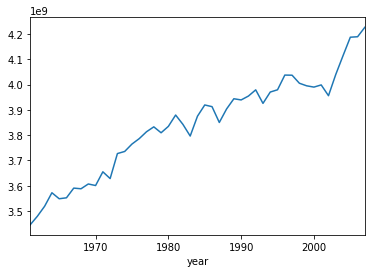

In [29]:
harvested_onlyCountries = areaHarvested[~areaHarvested.country_or_area.str.contains("\+", na = False)]
harvested_onlyCountries.groupby('year')['value'].apply(lambda x : x.astype(int).sum()).plot()

In [30]:
@interact
def show_beehives_for_geo_area(area=geo_areas):
    areaHarvested_continent=areaHarvested.loc[areaHarvested['country_or_area']==area]
    plt.plot(areaHarvested_continent['year'],areaHarvested_continent['value'],'-*')
    plt.title('Geographical area: '+area)
    plt.xlabel('Years')
    plt.ylabel('Number')
    plt.xlim(1960, 2010)

interactive(children=(Dropdown(description='area', options=('Africa +', 'Americas +', 'Asia +', 'Australia and…